# 1.Importing all the libraries and the data

In [ ]:
!gdown "1ihZAEWOBgmVBWhScMjw8G3Kz9XKj432v&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ihZAEWOBgmVBWhScMjw8G3Kz9XKj432v&confirm=t
To: /content/haberman.csv
100% 3.12k/3.12k [00:00<00:00, 6.09MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [ ]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

# 2.Info about the data

### Attribute Information:

1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
  * 1 = the patient survived 5 years or longer
  * 2 = the patient died within 5 year




Checking for Null values if  any by observing the count of the data points 

In [ ]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


We do not have any missing observations in the data(by looking at the count values)

# 3.Objective

Our objective is EDA keeping in mind out task of Classification, we will try to explore which features can help us in our task of classification, which variables have the capability to separate the classes completely or to some extent.

# 4.Lets dive deep

## 4.1 Count of the data points wrt the class(Survival Status)

In [ ]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

<Axes: xlabel='status', ylabel='count'>

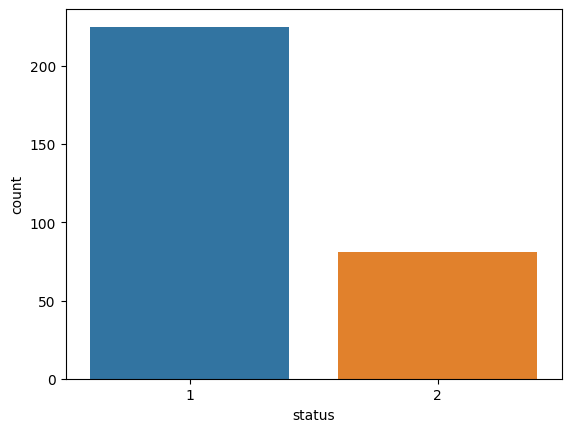

In [ ]:
sns.countplot(data=df,x='status')

### Observation:
We have more data for patients whose status = 1(survived > 5 years after surgery) as compared to patients having status = 2(survived < 5 years after surgery)

## 4.2 Observing at a more granular level:
Above we saw what is going on at a very high level, no.of patients for each class.

Lets try to see what is going on at a more granular level, what is the age bins inside each of the classes.

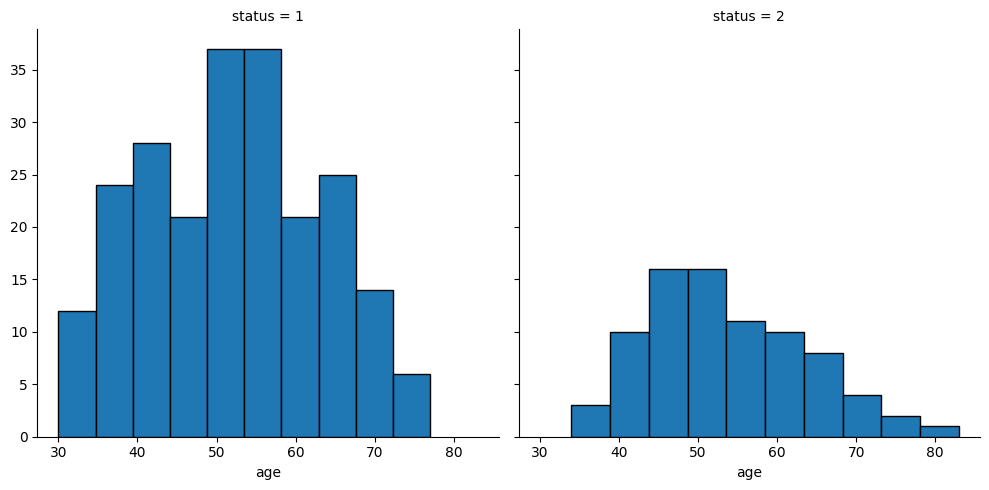

In [ ]:
g = sns.FacetGrid(df, col = "status", height=5)
g = g.map(plt.hist, 'age', edgecolor='black')
# plt.ylabel('Count of Patients')

### Observation:
The age bins for the patients are quite similar, although patients of Class 2 seem to have some patients who are 80 years old.

We cannot compare the heights for the two classes as we know that there are more data points for class 1 as compared to class 2.


## 4.3 Count of No.of Nodes

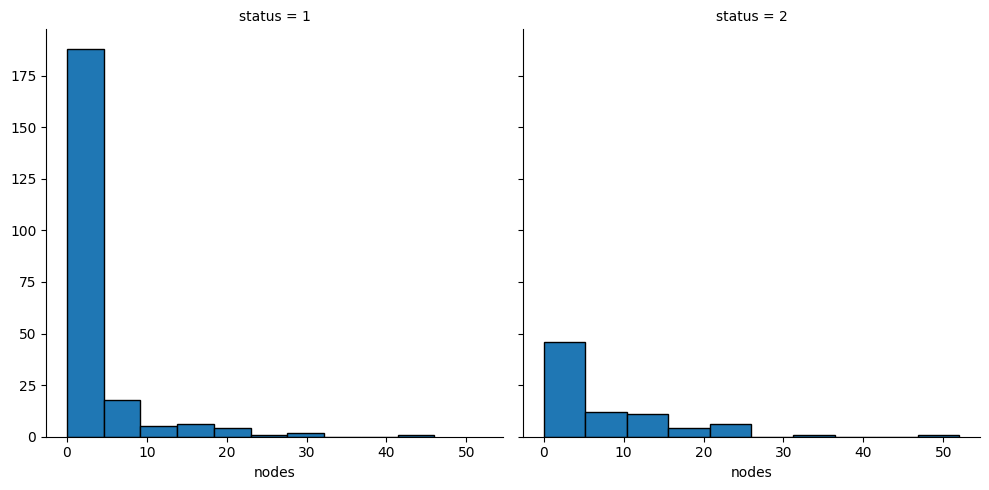

In [ ]:
g = sns.FacetGrid(df, col = "status", height=5)
g = g.map(plt.hist, 'nodes', edgecolor='black')
# plt.ylabel('Count of Patients')

### Observation:


## 4.3 Scatter of Nodes vs Age

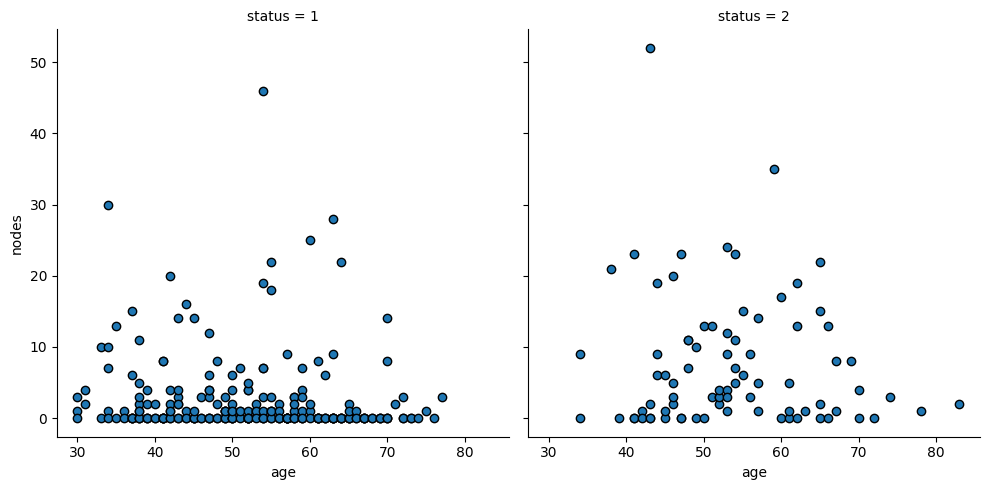

In [ ]:
g = sns.FacetGrid(df, col = "status", height=5)
g = g.map(plt.scatter, 'age', 'nodes', edgecolor='black')
# plt.ylabel('Count of Patients')

### Observation
* The no.of nodes for each age group corresponding to Class-1 has nodes close to 0 for most of the points.
* The no.of nodes for each age group corresponding to Class-2 has nodes greater than 0 for most of the points.

## 4.4 Pair - Plot of the whole data

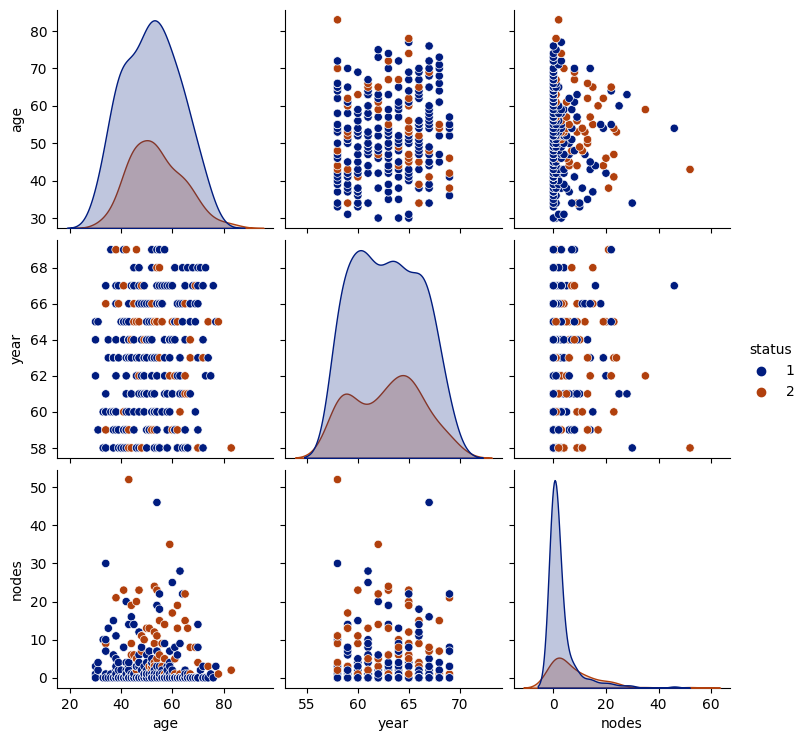

In [ ]:
sns.pairplot(df, hue='status', palette=sns.color_palette('dark',2))

### Observation
* Since the classes have an imbalance we cannot say anything merely by looking at the plots. 

* Here the plot age vs nodes looks interesting.
  * Here we can notice that the number of nodes for class 2 patitents are somewhat greater than the class 1 patients for most of the age groups.
* Another interesting pair of data points can be seen in the nodes vs year plot.
  * Here we can see that we have two very extreme points with many no. of nodes one belonging to class 1 and the other to class 2. Well nothing much to brag here, but by looking at the points we can say that there sure has been development in treatment over the few years:
    * as the point having high no.of nodes and treatment year ~ 1958, after treatment survives less than 5 years
    * while the patient having high no.of nodes and treatment year = 1968, after treatment survives more than 5 years.

___
* Since the classes have an imbalance we cannot say anything merely by looking at the pdf plots. Let's use some statistical measure that can tell us more by merely looking at the graph

## 4.5 Average No. of nodes vs Age for each Class

In [ ]:
# first lets see the average number of nodes for each of the classes.
print('-'*10,"Average",'-'*10)
print(f'Average no. of nodes for Class 1 patients: {df[df.status==1]["nodes"].mean():.4f}')
print(f'Average no. of nodes for Class 2 patients: {df[df.status==2]["nodes"].mean():.4f}')
print('='*100)

print('-'*10,"Median",'-'*10)
print(f'Median no. of nodes for Class 1 patients: {df[df.status==1]["nodes"].median():.4f}')
print(f'Median no. of nodes for Class 2 patients: {df[df.status==2]["nodes"].median():.4f}')
print('='*100)

print('-'*10,"90th Percentile",'-'*10)
print(f'90th Percentile no. of nodes for Class 1 patients: {df[df.status==1]["nodes"].quantile(0.9):.4f}')
print(f'90th Percentile no. of nodes for Class 2 patients: {df[df.status==2]["nodes"].quantile(0.9):.4f}')
print('='*100)


---------- Average ----------
Average no. of nodes for Class 1 patients: 2.7911
Average no. of nodes for Class 2 patients: 7.4568
---------- Median ----------
Median no. of nodes for Class 1 patients: 0.0000
Median no. of nodes for Class 2 patients: 4.0000
---------- 90th Percentile ----------
90th Percentile no. of nodes for Class 1 patients: 8.0000
90th Percentile no. of nodes for Class 2 patients: 20.0000


In [ ]:
# lets see whether this result holds for each of the age groups too:

In [ ]:
# Let's group the patients by the age for different classes and take average of nodes
avg_nodes_1 = df[df.status==1].groupby(by=['age']).mean()
avg_nodes_2 = df[df.status==2].groupby(by=['age']).mean()

# Adding age as columns in the data frame
avg_nodes_1['age'] = avg_nodes_1.index
avg_nodes_2['age'] = avg_nodes_2.index

# Now lets concat the two dataframes and plot it.
avg_nodes = pd.concat([avg_nodes_1, avg_nodes_2], ignore_index=True)
avg_nodes.head()

,year,nodes,status,age
0,63.666667,1.333333,1.0,30
1,62.000000,3.000000,1.0,31
2,59.000000,5.000000,1.0,33
3,61.200000,9.600000,1.0,34
4,63.500000,6.500000,1.0,35


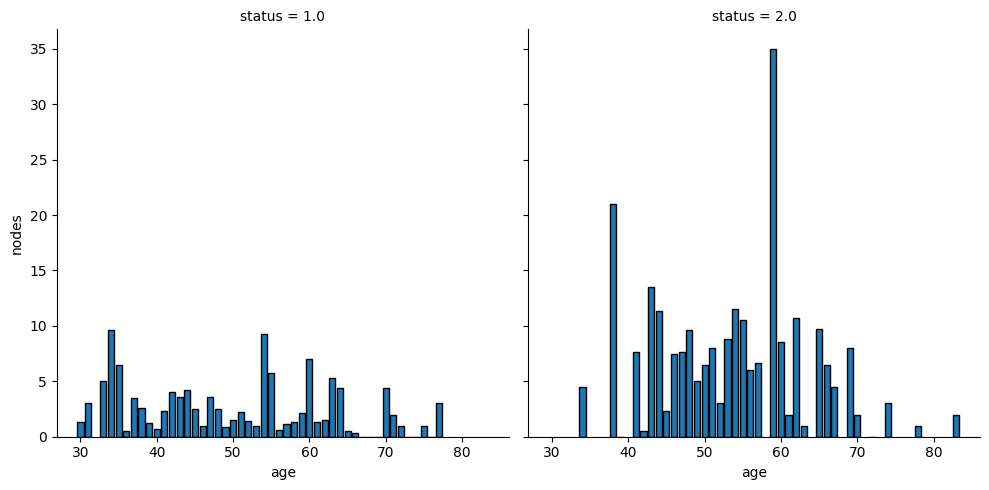

In [ ]:
g = sns.FacetGrid(avg_nodes, col = "status", height=5)
g = g.map(plt.bar, 'age', 'nodes', edgecolor='black')

<Axes: xlabel='age', ylabel='nodes'>

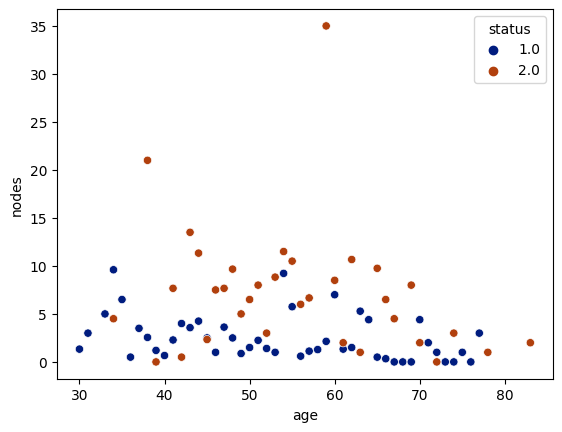

In [ ]:
# Lets visualize the above with a simple scatter plot
sns.scatterplot(avg_nodes, hue='status', x='age', y='nodes', palette=sns.color_palette('dark',2))

### Observation:
* Earlier we saw the count plot for ages vs nodes
* Here we can see clearly that the average number of nodes in age bins for the patients with status = 1 is lower than patients having status=2. 

* From this we can infer that patients having status = 2 having more average no.of nodes as compared to status 1 patients.

* Although for a few patients these results may not hold, which could be due to other factors playing their role, not covered in the dataset.


__We can add a feature, _average number of nodes_, corresponding to each of the age group in our dataset, which can further increase the separability of the classes.__

## 4.6 Is the no.of nodes feature really useful?
This can be confirmed by checking the PDF and CDF of nodes for both the classes.

<Axes: xlabel='nodes', ylabel='Density'>

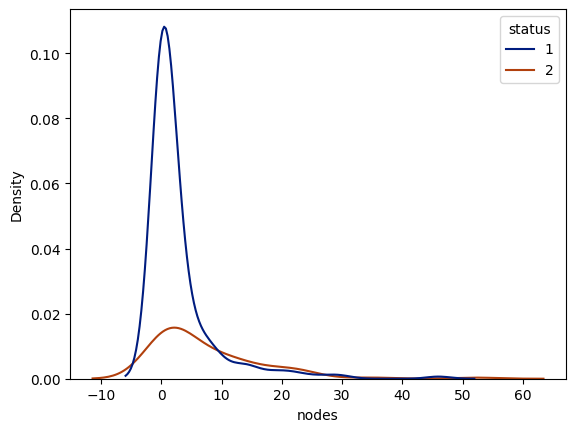

In [ ]:
sns.kdeplot(df, x='nodes',hue='status',palette=sns.color_palette('dark',2))

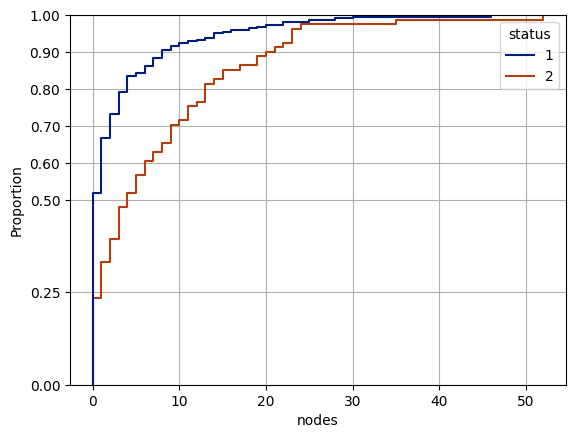

In [ ]:
sns.ecdfplot(df, x='nodes',hue='status',palette=sns.color_palette('dark',2))
plt.yticks([0.0, 0.25, 0.50, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.grid()

### Observations:

* The PDF plots don't express much except for the fact that for both, class-1 and class-2 patients, have more number of patients having nodes in the range of 0-10, with some class 2 patients having more than 50 nodes.

* The CDF plot on the other hand says that:
  * 90% of the : 
    * Class 1 patients have < 10 nodes, while 
    * Class 2 patients have < 20 nodes.
  * 25% to 100% of the:
    * Class 1 patients have nodes in the range : [0, 10)
    * Class 2 patients have nodes in the range : [0, 20]
  * 99% of the :
    * Class 1 patients have nodes <= 30, while
    * Class 2 patients have nodes <= 50 (approx)


__Class 2 patients have more number of nodes as compared to Class 1 patients__. This feature can be helpful for our task of classification.


## 4.7 KS-Test( Level of signiicance = 5% [lets say]) for No.of Nodes


H0 : The distribution of the nodes for the two classes are same i.e. F(x) = G(x)

H1: The alternative is that the distributions are not identical. 

In [ ]:
# We can use KS test on the above claim further
stats.ks_2samp(df[df.status==1]['nodes'], df[df.status==2]['nodes'])

KstestResult(statistic=0.33827160493827163, pvalue=1.4620232260147868e-06, statistic_location=2, statistic_sign=1)

### Observation:
The p-value obtained is much less than the level of significance which implies that our null hypothesis i.e. the two distributions are not identical may be true, which means they can be seperable.

This feature can be useful for our task of classification.

## 4.8 Other features

<Axes: xlabel='status', ylabel='age'>

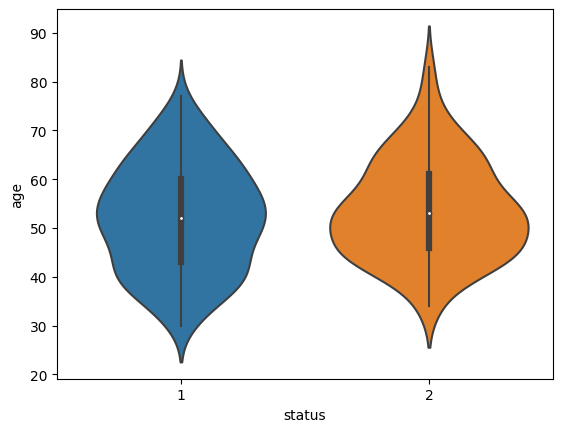

In [ ]:
sns.violinplot(x='status',y='age', data=df)

<Axes: xlabel='status', ylabel='year'>

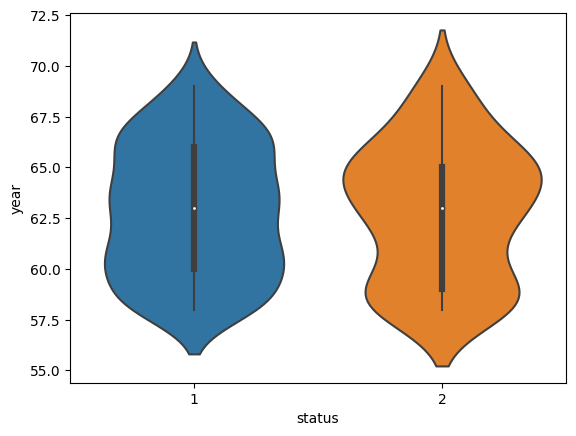

In [ ]:
sns.violinplot(x='status',y='year', data=df)

### Observation:
The above two features, age and year of operation are kind of overlapping in terms of their distributon for both the classes and hence may not be useful in separating the classes alone. But using them in conjunction with other features they may be of added value. 